# Análise de Gastos com Passagens Aéreas (SCDP)

## Informações
* Origem dos dados
```
Portal da Transparência (http://transparencia.gov.br/download-de-dados/viagens)
```
* Dicionário de dados
```
http://transparencia.gov.br/pagina-interna/603364-dicion%C3%A1rio-de-dados-viagens-a-Servi%C3%A7o-Pagamentos
```
* 4 arquivos:
    * 2018_Pagamento.csv
    * 2018_Passagem.csv
    * 2018_Trecho.csv
    * 2018_Viagem.csv

## Perguntas a serem respondidas?

* Qual o trecho mais executado?
* Qual o valor médio para o trecho mais executado?
* Qual a mediana para o trecho mais executado?
* Identificar possíveis outliers nos valores do trecho mais executado

In [2]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

plt.rcParams['figure.dpi'] = 90

# Leitura dos Dados
---

In [7]:
"""
Leia o arquivo
'dados/c04_passagens/2018_Passagem.csv.zip'
"""
df_passagens = pd.read_csv('dados/c04_passagens/2018_Passagem.csv.zip', encoding='iso-8859-1', sep="|", nrows=2)
df_passagens

,"Identificador do processo de viagem;""Meio de transporte"";""País - Origem ida"";""UF - Origem ida"";""Cidade - Origem ida"";""País - Destino ida"";""UF - Destino ida"";""Cidade - Destino ida"";""País - Origem volta"";""UF - Origem volta"";""Cidade - Origem volta"";""Pais - Destino volta"";""UF - Destino volta"";""Cidade - Destino volta"";""Valor da passagem"";""Taxa de serviço"""
0,"0000000000014046485;""Rodoviário"";""Brasil"";""Ceará"";""Fortaleza"";""Brasil"";""Ceará"";""Sobral"";""Sem Informação"";""Sem Informação"";""Sem Informação"";""Sem Informação"";""Sem Informação"";""Sem Informação"";""40,95"";""13,51"""
1,"0000000000014046485;""Rodoviário"";""Brasil"";""Ceará"";""Sobral"";""Brasil"";""Ceará"";""Fortaleza"";""Sem Informação"";""Sem Informação"";""Sem Informação"";""Sem Informação"";""Sem Informação"";""Sem Informação"";""33,25"";""10,97"""


In [179]:
df_passagens.shape

(310816, 16)

In [10]:
df_passagens = pd.read_csv('dados/c04_passagens/2018_Passagem.csv.zip', encoding='iso-8859-1', sep=";")
df_passagens.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço
0,14046485,Rodoviário,Brasil,Ceará,Fortaleza,Brasil,Ceará,Sobral,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,"40,95","13,51"
1,14046485,Rodoviário,Brasil,Ceará,Sobral,Brasil,Ceará,Fortaleza,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,"33,25","10,97"
2,14166390,Aéreo,Brasil,Paraná,Londrina,Brasil,Mato Grosso,Sinop,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,"518,09",",00"
3,14166390,Aéreo,Brasil,Mato Grosso,Sinop,Brasil,Paraná,Londrina,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,"665,38",",00"
4,14201345,Aéreo,Brasil,Paraná,Curitiba,Brasil,Rio Grande do Sul,Porto Alegre,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,"369,30",",00"


# Identificação de valores nulos ou faltantes
---

In [3]:
df_passagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310816 entries, 0 to 310815
Data columns (total 16 columns):
Identificador do processo de viagem    310816 non-null int64
Meio de transporte                     310816 non-null object
País - Origem ida                      310816 non-null object
UF - Origem ida                        303560 non-null object
Cidade - Origem ida                    310816 non-null object
País - Destino ida                     310816 non-null object
UF - Destino ida                       301096 non-null object
Cidade - Destino ida                   310816 non-null object
País - Origem volta                    310816 non-null object
UF - Origem volta                      307823 non-null object
Cidade - Origem volta                  310816 non-null object
Pais - Destino volta                   310816 non-null object
UF - Destino volta                     310234 non-null object
Cidade - Destino volta                 310816 non-null object
Valor da passagem     

In [4]:
df_passagens.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço
0,14046485,Rodoviário,Brasil,Ceará,Fortaleza,Brasil,Ceará,Sobral,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,"40,95","13,51"
1,14046485,Rodoviário,Brasil,Ceará,Sobral,Brasil,Ceará,Fortaleza,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,"33,25","10,97"
2,14166390,Aéreo,Brasil,Paraná,Londrina,Brasil,Mato Grosso,Sinop,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,"518,09",",00"
3,14166390,Aéreo,Brasil,Mato Grosso,Sinop,Brasil,Paraná,Londrina,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,"665,38",",00"
4,14201345,Aéreo,Brasil,Paraná,Curitiba,Brasil,Rio Grande do Sul,Porto Alegre,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,Sem Informação,"369,30",",00"


In [5]:
"""
Vamos verificar algumas estatísticas básicas sobre colunas numéricas.
"""

df_passagens.describe()

,Identificador do processo de viagem
count,310816.00
mean,34950773.58
std,199220763.01
min,14046485.00
25%,14763521.75
50%,14929268.00
75%,15105045.00
max,2018002771.00


In [27]:
"""
Vamos verificar algumas estatísticas básicas sobre as demais colunas.
"""

df_passagens.describe(include='object')

,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço
count,310816,310816,303560,310816,310816,301096,310816,23485,20492,23485,23485,22903,23485,310816,310816
unique,4,163,28,913,162,28,997,110,27,540,102,27,351,72794,1641
top,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,Distrito Federal,Brasília,Brasil,Distrito Federal,Brasília,Brasil,Distrito Federal,Brasília,",00",",00"
freq,293475,303557,80478,80478,301093,79346,79346,20492,5513,5513,22903,7356,7356,3299,281439


In [28]:
"""
Tratamento em todas as colunas para colocar o valor None quando o valor for 'Não informado' ou NaN
"""
for c in df_passagens.columns:
    df_passagens[c] = df_passagens[c].apply(lambda x: x if x != 'Sem Informação' and pd.notnull(x) else None)

In [29]:
df_passagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310816 entries, 0 to 310815
Data columns (total 16 columns):
Identificador do processo de viagem    310816 non-null int64
Meio de transporte                     310816 non-null object
País - Origem ida                      310816 non-null object
UF - Origem ida                        303560 non-null object
Cidade - Origem ida                    310816 non-null object
País - Destino ida                     310816 non-null object
UF - Destino ida                       301096 non-null object
Cidade - Destino ida                   310816 non-null object
País - Origem volta                    23485 non-null object
UF - Origem volta                      20492 non-null object
Cidade - Origem volta                  23485 non-null object
Pais - Destino volta                   23485 non-null object
UF - Destino volta                     22903 non-null object
Cidade - Destino volta                 23485 non-null object
Valor da passagem           

# Conversão das colunas para os tipos de dados corretos e padronização campos
---

In [30]:
"""
Verificamos valores nulos e tipos de dados com o método info() do dataframe.
"""

df_passagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310816 entries, 0 to 310815
Data columns (total 16 columns):
Identificador do processo de viagem    310816 non-null int64
Meio de transporte                     310816 non-null object
País - Origem ida                      310816 non-null object
UF - Origem ida                        303560 non-null object
Cidade - Origem ida                    310816 non-null object
País - Destino ida                     310816 non-null object
UF - Destino ida                       301096 non-null object
Cidade - Destino ida                   310816 non-null object
País - Origem volta                    23485 non-null object
UF - Origem volta                      20492 non-null object
Cidade - Origem volta                  23485 non-null object
Pais - Destino volta                   23485 non-null object
UF - Destino volta                     22903 non-null object
Cidade - Destino volta                 23485 non-null object
Valor da passagem           

In [31]:
"""
A conversão pode ser feita utilizando o método apply da série que deseja converter.
"""
def converter_numero(valor):
    try:
        return float(valor.replace('.', '').replace(',', '.'))
    except:
        return np.nan

df_passagens_1 = df_passagens.copy()
df_passagens_1['Valor da passagem'] = df_passagens_1['Valor da passagem'].apply(converter_numero)
df_passagens_1['Taxa de serviço'] = df_passagens_1['Taxa de serviço'].apply(converter_numero)

In [32]:
df_passagens_1[['Valor da passagem', 'Taxa de serviço']].head()

,Valor da passagem,Taxa de serviço
0,40.95,13.51
1,33.25,10.97
2,518.09,0.00
3,665.38,0.00
4,369.30,0.00


In [33]:
df_passagens_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310816 entries, 0 to 310815
Data columns (total 16 columns):
Identificador do processo de viagem    310816 non-null int64
Meio de transporte                     310816 non-null object
País - Origem ida                      310816 non-null object
UF - Origem ida                        303560 non-null object
Cidade - Origem ida                    310816 non-null object
País - Destino ida                     310816 non-null object
UF - Destino ida                       301096 non-null object
Cidade - Destino ida                   310816 non-null object
País - Origem volta                    23485 non-null object
UF - Origem volta                      20492 non-null object
Cidade - Origem volta                  23485 non-null object
Pais - Destino volta                   23485 non-null object
UF - Destino volta                     22903 non-null object
Cidade - Destino volta                 23485 non-null object
Valor da passagem           

In [34]:
"""
Padronização das strings é interessante para que a ausência ou a presença de acentos não interfira em agrupamentos.
"""

from libs.texto import TratamentoTexto
def tratar_texto(valor):
    v = valor
    
    # somente realiza o tratamento se o texto não for nulo
    if v:
        # remove acentuação
        #v = str(v)
        v = TratamentoTexto.remover_acentuacao(v)
        # converte para letras maiúsculas
        v = v.upper()
        
    return v

colunas = ['Meio de transporte',
       'País - Origem ida', 'UF - Origem ida', 'Cidade - Origem ida',
       'País - Destino ida', 'UF - Destino ida', 'Cidade - Destino ida',
       'País - Origem volta', 'UF - Origem volta', 'Cidade - Origem volta',
       'Pais - Destino volta', 'UF - Destino volta', 'Cidade - Destino volta']

# padronize as colunas da lista acima no dataframe df_passagens_1
for c in colunas:
    df_passagens_1[c] = df_passagens_1[c].apply(tratar_texto)

df_passagens_1.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço
0,14046485,RODOVIARIO,BRASIL,CEARA,FORTALEZA,BRASIL,CEARA,SOBRAL,None,None,None,None,None,None,40.95,13.51
1,14046485,RODOVIARIO,BRASIL,CEARA,SOBRAL,BRASIL,CEARA,FORTALEZA,None,None,None,None,None,None,33.25,10.97
2,14166390,AEREO,BRASIL,PARANA,LONDRINA,BRASIL,MATO GROSSO,SINOP,None,None,None,None,None,None,518.09,0.00
3,14166390,AEREO,BRASIL,MATO GROSSO,SINOP,BRASIL,PARANA,LONDRINA,None,None,None,None,None,None,665.38,0.00
4,14201345,AEREO,BRASIL,PARANA,CURITIBA,BRASIL,RIO GRANDE DO SUL,PORTO ALEGRE,None,None,None,None,None,None,369.30,0.00


# Você já está pensando em responder as questões?

Não é uma boa idéia na maioria dos casos.

In [35]:
colunas_gb = ['País - Origem ida', 'UF - Origem ida', 'Cidade - Origem ida',
       'País - Destino ida', 'UF - Destino ida', 'Cidade - Destino ida']

colunas_selecao = ['País - Origem ida', 'UF - Origem ida', 'Cidade - Origem ida',
       'País - Destino ida', 'UF - Destino ida', 'Cidade - Destino ida', 'Valor da passagem']

df_passagens_1[colunas_selecao]\
    .groupby(colunas_gb, as_index=False)\
    .agg(['count', 'mean', 'median'])\
    .sort_values(('Valor da passagem', 'count'), ascending=False)\
    .head(10)

Valor da passagem  \
                                                                                                                              count   
País - Origem ida UF - Origem ida   Cidade - Origem ida País - Destino ida UF - Destino ida  Cidade - Destino ida                     
BRASIL            RIO DE JANEIRO    RIO DE JANEIRO      BRASIL             DISTRITO FEDERAL  BRASILIA                         14034   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO DE JANEIRO    RIO DE JANEIRO                   13933   
                                                                           SAO PAULO         SAO PAULO                        12271   
                  SAO PAULO         SAO PAULO           BRASIL             DISTRITO FEDERAL  BRASILIA                         12027   
                  RIO GRANDE DO SUL PORTO ALEGRE        BRASIL             DISTRITO FEDERAL  BRASILIA                          4092   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO GRANDE DO SUL PORTO ALEGRE                      3980   
                  RIO DE JANEIRO    RIO DE JANEIRO      BRASIL             SAO PAULO         SAO PAULO                         3603   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             MINAS GERAIS      BELO HORIZONTE                    3535   
                  MINAS GERAIS      BELO HORIZONTE      BRASIL             DISTRITO FEDERAL  BRASILIA                          3499   
                  SAO PAULO         SAO PAULO           BRASIL             RIO DE JANEIRO    RIO DE JANEIRO                    3459   

                                                                                                                          \
                                                                                                                    mean   
País - Origem ida UF - Origem ida   Cidade - Origem ida País - Destino ida UF - Destino ida  Cidade - Destino ida          
BRASIL            RIO DE JANEIRO    RIO DE JANEIRO      BRASIL             DISTRITO FEDERAL  BRASILIA             665.59   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO DE JANEIRO    RIO DE JANEIRO       621.79   
                                                                           SAO PAULO         SAO PAULO            696.73   
                  SAO PAULO         SAO PAULO           BRASIL             DISTRITO FEDERAL  BRASILIA             685.14   
                  RIO GRANDE DO SUL PORTO ALEGRE        BRASIL             DISTRITO FEDERAL  BRASILIA             767.78   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO GRANDE DO SUL PORTO ALEGRE         713.10   
                  RIO DE JANEIRO    RIO DE JANEIRO      BRASIL             SAO PAULO         SAO PAULO            354.40   
                  DISTRITO FEDERAL  BRASILIA            BRASIL             MINAS GERAIS      BELO HORIZONTE       643.77   
                  MINAS GERAIS      BELO HORIZONTE      BRASIL             DISTRITO FEDERAL  BRASILIA             643.06   
                  SAO PAULO         SAO PAULO           BRASIL             RIO DE JANEIRO    RIO DE JANEIRO       342.41   

                                                                                                                          
                                                                                                                  median  
País - Origem ida UF - Origem ida   Cidade - Origem ida País - Destino ida UF - Destino ida  Cidade - Destino ida         
BRASIL            RIO DE JANEIRO    RIO DE JANEIRO      BRASIL             DISTRITO FEDERAL  BRASILIA             567.11  
                  DISTRITO FEDERAL  BRASILIA            BRASIL             RIO DE JANEIRO    RIO DE JANEIRO       527.03  
                                                                           SAO PAULO         SAO PAULO            559.69  
       

# Entendimento e organização dos dados

Vamos olhar as variáveis de interesse separadamente.

## Identificador do processo de viagem

In [50]:
df_tmp = df_passagens_1['Identificador do processo de viagem'].value_counts()
df_tmp.head()

15190575    14
15074640    14
14749310    13
14797422    12
14845792    11
Name: Identificador do processo de viagem, dtype: int64

In [53]:
df_tmp[ df_tmp > 5 ].head()

15190575    14
15074640    14
14749310    13
14797422    12
14845792    11
Name: Identificador do processo de viagem, dtype: int64

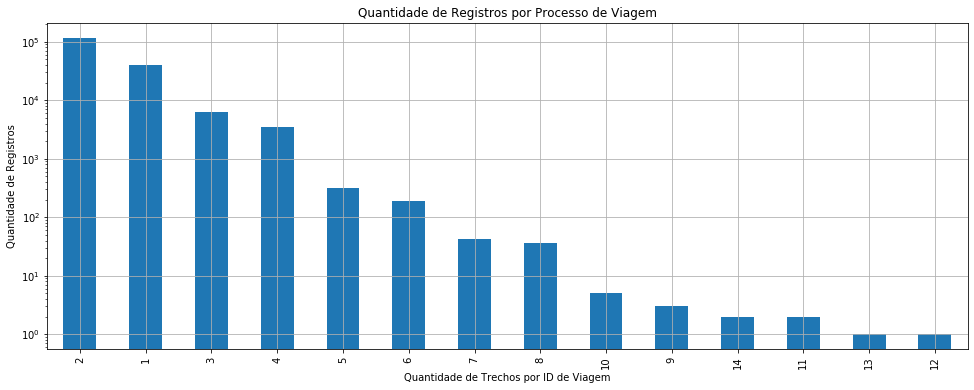

In [44]:
plt.rcParams['figure.figsize'] = (16.5,6)
df_passagens_1['Identificador do processo de viagem'].value_counts().value_counts().plot.bar()
plt.xlabel('Quantidade de Trechos por ID de Viagem')
plt.ylabel('Quantidade de Registros')
plt.yscale('log')
plt.grid(True)
plt.title('Quantidade de Registros por Processo de Viagem')
plt.show()

In [45]:
'''
Exemplo de uma viagem com 3 trechos
'''
df_passagens_1[ df_passagens_1['Identificador do processo de viagem'] == 14756123 ]

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço
74183,14756123,AEREO,BRASIL,CEARA,FORTALEZA,BRASIL,BAHIA,SALVADOR,None,None,None,None,None,None,285.86,0.00
74184,14756123,AEREO,BRASIL,BAHIA,SALVADOR,BRASIL,DISTRITO FEDERAL,BRASILIA,None,None,None,None,None,None,368.31,0.00
74185,14756123,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,CEARA,FORTALEZA,None,None,None,None,None,None,552.33,0.00


In [46]:
'''
Exemplo de uma viagem com 5 trechos
'''
df_passagens_1[ df_passagens_1['Identificador do processo de viagem'] == 14825056 ]

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço
106975,14825056,AEREO,ESTADOS UNIDOS DA AMERICA,None,MIAMI,ESTADOS UNIDOS DA AMERICA,None,CHARLOTTE - CAROLINA DO NORTE,None,None,None,None,None,None,1762.05,0.00
106976,14825056,AEREO,ESTADOS UNIDOS DA AMERICA,None,MIAMI,BRASIL,DISTRITO FEDERAL,BRASILIA,None,None,None,None,None,None,1812.01,0.00
106977,14825056,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,ESTADOS UNIDOS DA AMERICA,None,MIAMI,None,None,None,None,None,None,1762.05,0.00
106978,14825056,AEREO,ESTADOS UNIDOS DA AMERICA,None,INDIANAPOLIS,ESTADOS UNIDOS DA AMERICA,None,MIAMI,None,None,None,None,None,None,1762.05,0.00
106979,14825056,AEREO,ESTADOS UNIDOS DA AMERICA,None,CHARLOTTE - CAROLINA DO NORTE,ESTADOS UNIDOS DA AMERICA,None,INDIANAPOLIS,None,None,None,None,None,None,1762.05,0.00


In [47]:
'''
Exemplo de uma viagem com 14 trechos
'''
df_passagens_1[ df_passagens_1['Identificador do processo de viagem'] == 15190575 ]

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço
262511,15190575,AEREO,FILIPINAS,None,MANILLA,COREIA DO SUL,None,SEUL,None,None,None,None,None,None,1449.92,0.00
262512,15190575,AEREO,TAILANDIA,None,BANGCOC,LAOS,None,VIENTIANE,None,None,None,None,None,None,1685.39,0.00
262513,15190575,AEREO,LAOS,None,VIENTIANE,TAILANDIA,None,BANGCOC,None,None,None,None,None,None,0.00,0.00
262514,15190575,AEREO,TAILANDIA,None,BANGCOC,MYANMAR,None,NAY PYI TAW,None,None,None,None,None,None,1425.89,0.00
262515,15190575,AEREO,MYANMAR,None,YANGON,FILIPINAS,None,MANILLA,None,None,None,None,None,None,4305.86,0.00
262516,15190575,AEREO,BRASIL,SAO PAULO,SAO PAULO,BRASIL,DISTRITO FEDERAL,BRASILIA,None,None,None,None,None,None,393.66,0.00
262517,15190575,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,SAO PAULO,SAO PAULO,None,None,None,None,None,None,1145.17,0.00
262518,15190575,AEREO,COREIA DO SUL,None,SEUL,MONGOLIA,None,ULAN-BATOR,None,None,None,None,None,None,1403.02,0.00
262519,15190575,AEREO,MYANMAR,None,NAY PYI TAW,MYANMAR,None,YANGON,None,None,None,None,None,None,608.52,0.00
262520,15190575,AEREO,BRASIL,SAO PAULO,SAO PAULO,TAILANDIA,None,BANGCOC,None,None,None,None,None,None,5533.52,0.00


In [48]:
df_passagens_1.describe(include='all')

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço
count,310816.00,310816,310816,303560,310816,310816,301096,310816,23485,20492,23485,23485,22903,23485,310816.00,310816.00
unique,nan,4,148,28,912,146,28,996,99,27,540,101,27,351,nan,nan
top,nan,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,DISTRITO FEDERAL,BRASILIA,nan,nan
freq,nan,293475,303557,80478,80478,301093,79346,79346,20492,5513,5513,22903,7356,7356,nan,nan
mean,34950773.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,826.33,3.04
std,199220763.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1061.66,67.42
min,14046485.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
25%,14763521.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,368.78,0.00
50%,14929268.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,598.90,0.00
75%,15105045.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,946.43,0.00


In [65]:
"""
Vamos criar uma coluna que identifica se o trecho faz parte de uma viagem internacional ou não
"""

# vamos marcar trechos que são de origem ou destino internacional
df_passagens_1['Trecho Internacional'] = \
    (df_passagens_1['País - Origem ida'] != 'BRASIL') | (df_passagens_1['País - Destino ida'] != 'BRASIL') \
    | ( (df_passagens_1['País - Origem volta'].notnull()) & ((df_passagens_1['País - Origem volta'] != 'BRASIL') | (df_passagens_1['Pais - Destino volta'] != 'BRASIL'))) \

df_passagens_1[df_passagens_1['Trecho Internacional']].shape

(14810, 18)

In [66]:
# vamos marcar trechos que são de origem e destino são nacionais
df_passagens_1['Trecho Nacional'] = \
    (df_passagens_1['País - Origem ida'] == 'BRASIL') & (df_passagens_1['País - Destino ida'] == 'BRASIL')

In [79]:
# quais viagens possuem ao menos um trecho internacional
df_viagens_internacionais = \
    df_passagens_1[['Identificador do processo de viagem','Trecho Internacional']]\
    .groupby('Identificador do processo de viagem', as_index=False)\
    .max()

df_viagens_internacionais.head()

,Identificador do processo de viagem,Trecho Internacional
0,14046485,False
1,14166390,False
2,14201345,False
3,14223544,True
4,14227023,False


In [ ]:
# outra abordagem para o mesmo problema
processos = []
for idx, df_grupo in df_passagens_1[['Identificador do processo de viagem','Trecho Internacional']]\
        .groupby('Identificador do processo de viagem', as_index=False):
    internacional = False
    for v in df_grupo['Trecho Internacional']:
        if v == True:
            internacional = True
    processos.append((idx, internacional))

In [80]:
df_viagens_internacionais = pd.DataFrame(processos, columns=['Identificador do processo de viagem','Trecho Internacional'])
df_viagens_internacionais.head()

,Identificador do processo de viagem,Trecho Internacional
0,14046485,False
1,14166390,False
2,14201345,False
3,14223544,True
4,14227023,False


In [81]:
# quais processos de viagem possuem trechos internacionais
df_viagens_internacionais = df_viagens_internacionais.rename(columns={'Trecho Internacional': 'Viagem Internacional'})
df_viagens_internacionais.head()

,Identificador do processo de viagem,Viagem Internacional
0,14046485,False
1,14166390,False
2,14201345,False
3,14223544,True
4,14227023,False


In [83]:
df_passagens_2 = pd.merge(df_passagens_1, df_viagens_internacionais, how='left', 
                          left_on='Identificador do processo de viagem', right_on='Identificador do processo de viagem')
df_passagens_2.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Trecho Internacional,Trecho Nacional,Viagem Internacional
0,14046485,RODOVIARIO,BRASIL,CEARA,FORTALEZA,BRASIL,CEARA,SOBRAL,None,None,None,None,None,None,40.95,13.51,False,True,False
1,14046485,RODOVIARIO,BRASIL,CEARA,SOBRAL,BRASIL,CEARA,FORTALEZA,None,None,None,None,None,None,33.25,10.97,False,True,False
2,14166390,AEREO,BRASIL,PARANA,LONDRINA,BRASIL,MATO GROSSO,SINOP,None,None,None,None,None,None,518.09,0.00,False,True,False
3,14166390,AEREO,BRASIL,MATO GROSSO,SINOP,BRASIL,PARANA,LONDRINA,None,None,None,None,None,None,665.38,0.00,False,True,False
4,14201345,AEREO,BRASIL,PARANA,CURITIBA,BRASIL,RIO GRANDE DO SUL,PORTO ALEGRE,None,None,None,None,None,None,369.30,0.00,False,True,False


In [86]:
df_passagens_2['Viagem Internacional'].value_counts()/(df_passagens_2['Viagem Internacional'].count())

False   0.95
True    0.05
Name: Viagem Internacional, dtype: float64

In [88]:
df_passagens_2[df_passagens_2['Identificador do processo de viagem'] == 14342418]


,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Trecho Internacional,Trecho Nacional,Viagem Internacional
50,14342418,AEREO,BRASIL,MINAS GERAIS,GOVERNADOR VALADARES,BRASIL,RIO DE JANEIRO,RIO DE JANEIRO,None,None,None,None,None,None,496.60,0.00,False,True,True
51,14342418,AEREO,BRASIL,RIO DE JANEIRO,RIO DE JANEIRO,BRASIL,MINAS GERAIS,GOVERNADOR VALADARES,None,None,None,None,None,None,233.50,0.00,False,True,True
52,14342418,AEREO,ARGENTINA,None,BUENOS AIRES,BRASIL,RIO DE JANEIRO,RIO DE JANEIRO,None,None,None,None,None,None,1008.63,0.00,True,False,True
53,14342418,AEREO,BRASIL,RIO DE JANEIRO,RIO DE JANEIRO,ARGENTINA,None,BUENOS AIRES,None,None,None,None,None,None,1398.93,0.00,True,False,True


In [98]:
df_passagens_g['Trecho Internacional'].apply(lambda x: 'Internacional' if x else 'Nacional').value_counts()

Nacional         294807
Internacional     12710
Name: Trecho Internacional, dtype: int64

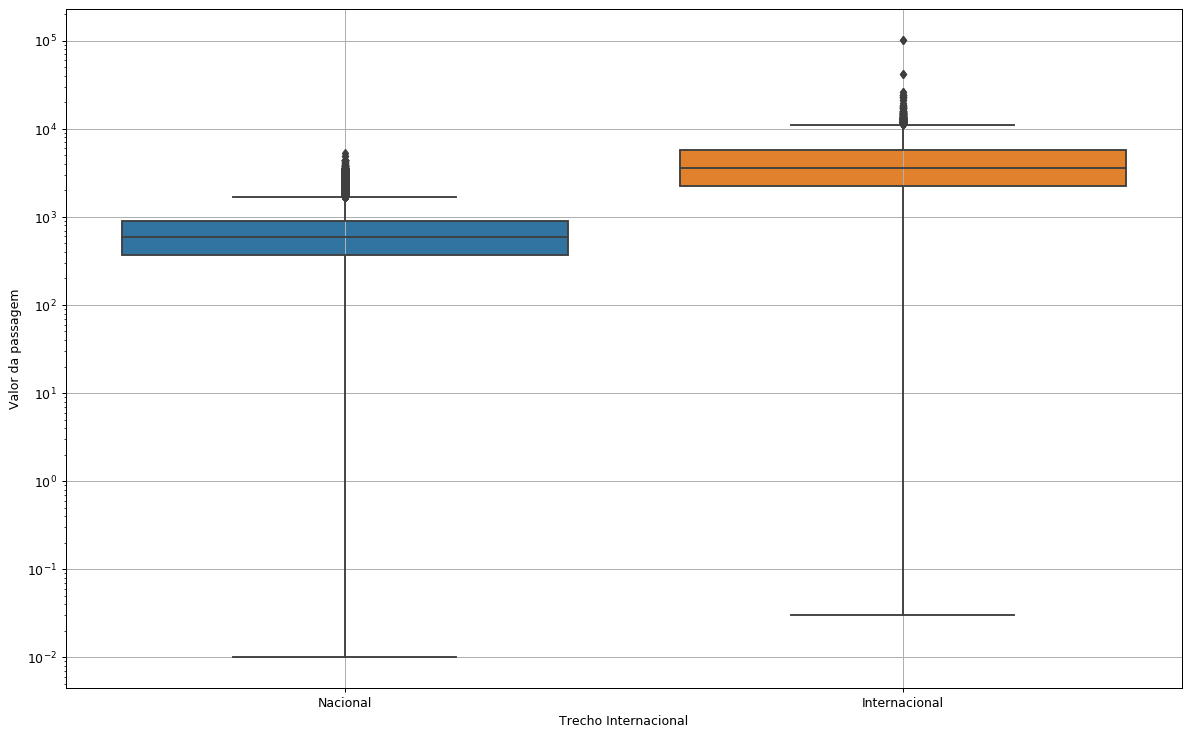

In [119]:
df_passagens_g = df_passagens_2[df_passagens_2['Valor da passagem'] > 0.001] 
plt.rcParams['figure.figsize'] = 16,10
ax = sns.boxplot(y=df_passagens_g['Valor da passagem'], x=df_passagens_g['Trecho Internacional'].apply(lambda x: 'Internacional' if x else 'Nacional'))
ax.set_yscale('log')
#ax.plot([-1000, 1000], [1000,1000], color='red', linewidth=2, markersize=12)
plt.grid(True)
plt.show()

### Observações

* Número de trechos interfere no valor das passagens?
* Trechos domésticos e viagens internacionais possuem valor superior aos dos trechos domésticos em viagens nacionais?
* Trechos com valores muito baixos. Como isso é possível?

## Meio de transporte
---

In [100]:
df_passagens_1['Meio de transporte'].value_counts()

AEREO          293475
RODOVIARIO      14594
FLUVIAL          2733
FERROVIARIO        14
Name: Meio de transporte, dtype: int64

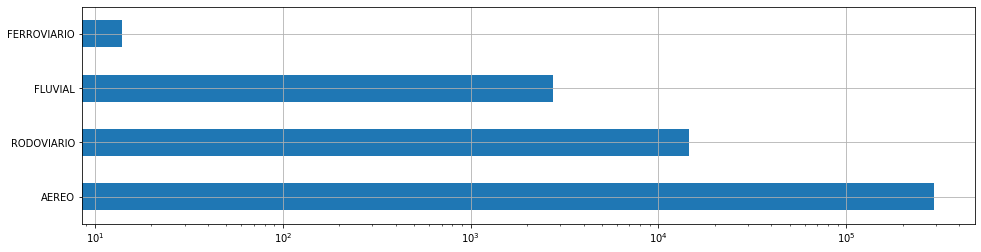

In [101]:
plt.rcParams["figure.figsize"] = 16, 4
ax = df_passagens_1['Meio de transporte'].value_counts().plot.barh()
ax.set_xscale('log')
plt.grid(True)
plt.show()

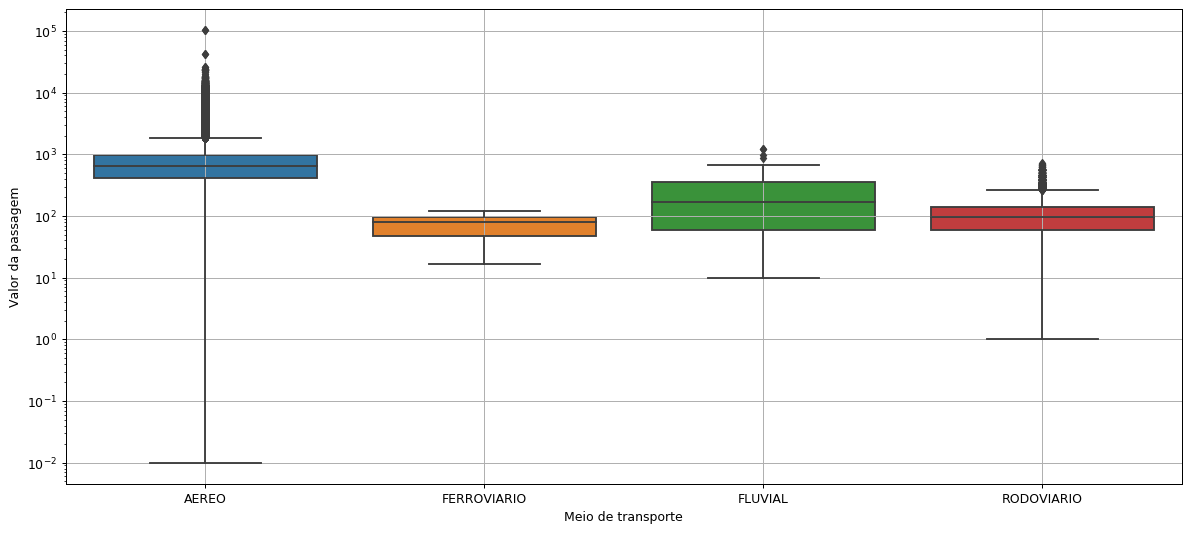

In [104]:
plt.rcParams['figure.figsize'] = 16,7
plt.rcParams['figure.dpi'] = 90

df_passagens_g = df_passagens_2[df_passagens_2['Valor da passagem']>0]

sns.boxplot(df_passagens_g['Meio de transporte'], 
            df_passagens_g['Valor da passagem'], 
            order=df_passagens_g['Meio de transporte'].drop_duplicates().sort_values())
plt.yscale('log')
plt.ylim = [0, 150000]
plt.grid(True)
plt.show()

### Observações

* Trechos aéreos acompanhados de outras modalidades possuem valor diferenciado?
* Foco nos trechos aéreos

## Taxa de Serviço
---

In [110]:
df_passagens_1['Taxa de serviço'].describe()

count   310816.00
mean         3.04
std         67.42
min          0.00
25%          0.00
50%          0.00
75%          0.00
max       8729.52
Name: Taxa de serviço, dtype: float64

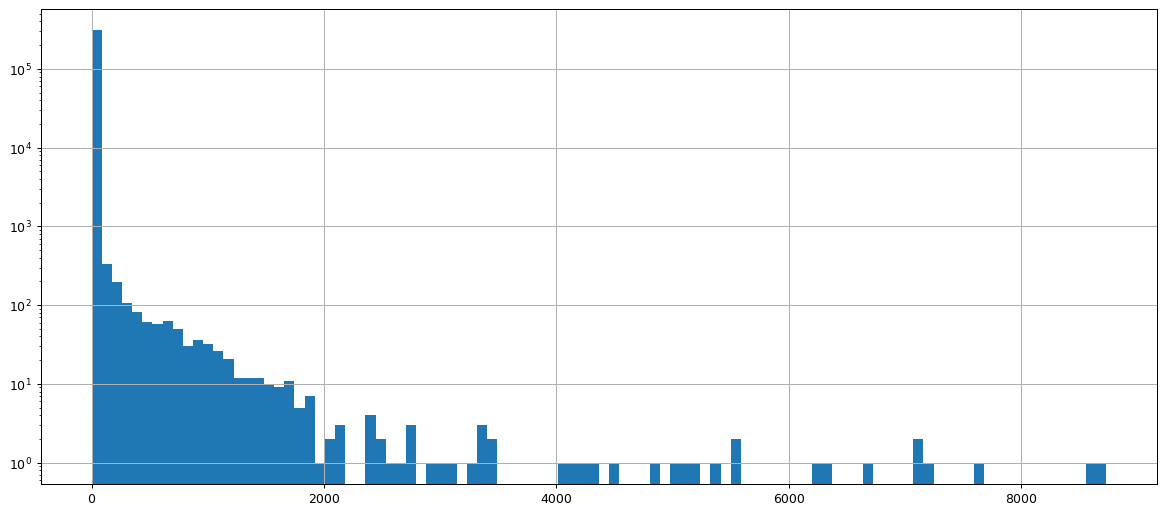

In [109]:
"""
Muitos registros zerados.
""" 
df_passagens_1['Taxa de serviço'].hist(bins=100)
plt.yscale('log')
plt.show()

In [111]:
df_passagens_1['Taxa de serviço'].describe().to_frame()

,Taxa de serviço
count,310816.00
mean,3.04
std,67.42
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,8729.52


In [ ]:
df_passagens_g = df_passagens_2[df_passagens_2['Taxa de serviço']>0]

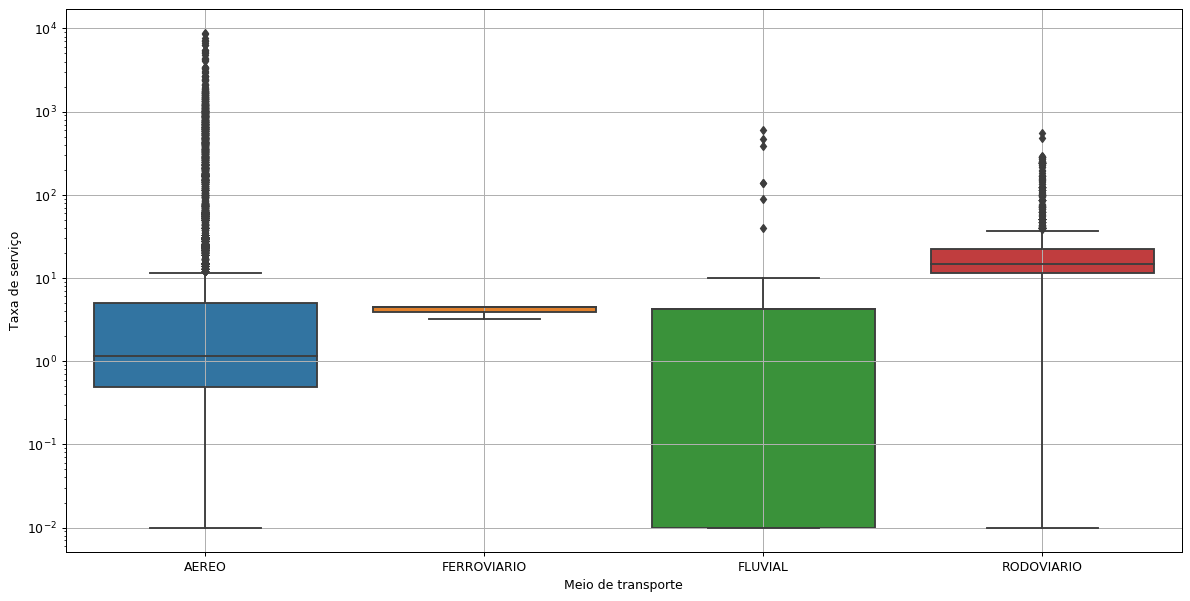

In [112]:
plt.rcParams['figure.figsize'] = 16,8
sns.boxplot(
    x='Meio de transporte', 
    y='Taxa de serviço', 
    data=df_passagens_g, 
    order=df_passagens_g['Meio de transporte'].drop_duplicates().sort_values()
)
plt.yscale('log')
plt.grid(True)
plt.show()

### Observações

* Campo com poucas observações relevantes.
* Talvez seja interessante investigar os outliers com valores altos.
* Para o propósito levantado inicialmente, este campo não é necessário.

## Origem, Destino, Ida e Volta

In [120]:
"""
Ocorrência da mesma variável em mais de uma coluna no dataset.
"""
df_passagens_2.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Trecho Internacional,Trecho Nacional,Viagem Internacional
0,14046485,RODOVIARIO,BRASIL,CEARA,FORTALEZA,BRASIL,CEARA,SOBRAL,None,None,None,None,None,None,40.95,13.51,False,True,False
1,14046485,RODOVIARIO,BRASIL,CEARA,SOBRAL,BRASIL,CEARA,FORTALEZA,None,None,None,None,None,None,33.25,10.97,False,True,False
2,14166390,AEREO,BRASIL,PARANA,LONDRINA,BRASIL,MATO GROSSO,SINOP,None,None,None,None,None,None,518.09,0.00,False,True,False
3,14166390,AEREO,BRASIL,MATO GROSSO,SINOP,BRASIL,PARANA,LONDRINA,None,None,None,None,None,None,665.38,0.00,False,True,False
4,14201345,AEREO,BRASIL,PARANA,CURITIBA,BRASIL,RIO GRANDE DO SUL,PORTO ALEGRE,None,None,None,None,None,None,369.30,0.00,False,True,False


In [147]:
"""
Vamos organizar.
"""
df_passagens_3 = df_passagens_2.copy()

In [148]:
df_passagens_3[df_passagens_3['País - Origem volta'].notnull()].shape

(23485, 19)

In [149]:
df_passagens_3.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Trecho Internacional,Trecho Nacional,Viagem Internacional
0,14046485,RODOVIARIO,BRASIL,CEARA,FORTALEZA,BRASIL,CEARA,SOBRAL,None,None,None,None,None,None,40.95,13.51,False,True,False
1,14046485,RODOVIARIO,BRASIL,CEARA,SOBRAL,BRASIL,CEARA,FORTALEZA,None,None,None,None,None,None,33.25,10.97,False,True,False
2,14166390,AEREO,BRASIL,PARANA,LONDRINA,BRASIL,MATO GROSSO,SINOP,None,None,None,None,None,None,518.09,0.00,False,True,False
3,14166390,AEREO,BRASIL,MATO GROSSO,SINOP,BRASIL,PARANA,LONDRINA,None,None,None,None,None,None,665.38,0.00,False,True,False
4,14201345,AEREO,BRASIL,PARANA,CURITIBA,BRASIL,RIO GRANDE DO SUL,PORTO ALEGRE,None,None,None,None,None,None,369.30,0.00,False,True,False


In [150]:
df_passagens_3.head(12)

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Trecho Internacional,Trecho Nacional,Viagem Internacional
0,14046485,RODOVIARIO,BRASIL,CEARA,FORTALEZA,BRASIL,CEARA,SOBRAL,None,None,None,None,None,None,40.95,13.51,False,True,False
1,14046485,RODOVIARIO,BRASIL,CEARA,SOBRAL,BRASIL,CEARA,FORTALEZA,None,None,None,None,None,None,33.25,10.97,False,True,False
2,14166390,AEREO,BRASIL,PARANA,LONDRINA,BRASIL,MATO GROSSO,SINOP,None,None,None,None,None,None,518.09,0.00,False,True,False
3,14166390,AEREO,BRASIL,MATO GROSSO,SINOP,BRASIL,PARANA,LONDRINA,None,None,None,None,None,None,665.38,0.00,False,True,False
4,14201345,AEREO,BRASIL,PARANA,CURITIBA,BRASIL,RIO GRANDE DO SUL,PORTO ALEGRE,None,None,None,None,None,None,369.30,0.00,False,True,False
5,14201345,AEREO,BRASIL,RIO GRANDE DO SUL,PORTO ALEGRE,BRASIL,PARANA,CURITIBA,None,None,None,None,None,None,170.45,0.00,False,True,False
6,14223544,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BOLIVIA,None,SANTA CRUZ DE LA SIERRA,None,None,None,None,None,None,767.79,0.00,True,False,True
7,14227023,AEREO,BRASIL,SAO PAULO,RIBEIRAO PRETO,BRASIL,PARANA,CURITIBA,None,None,None,None,None,None,635.28,0.00,False,True,False
8,14227023,AEREO,BRASIL,PARANA,CURITIBA,BRASIL,SAO PAULO,RIBEIRAO PRETO,None,None,None,None,None,None,562.13,0.00,False,True,False
9,14263076,AEREO,BRASIL,SAO PAULO,SAO PAULO,CANADA,None,VANCOUVER,None,None,None,None,None,None,3635.74,0.00,True,False,True


In [151]:
for idx, s in df_passagens_3[df_passagens_3['País - Origem volta'].notnull()].iterrows():
    print(idx)
    print(s)
    break
    

10
Identificador do processo de viagem            14271222
Meio de transporte                                AEREO
País - Origem ida                                BRASIL
UF - Origem ida                        DISTRITO FEDERAL
Cidade - Origem ida                            BRASILIA
País - Destino ida                               BRASIL
UF - Destino ida                         RIO DE JANEIRO
Cidade - Destino ida                     RIO DE JANEIRO
País - Origem volta                              BRASIL
UF - Origem volta                        RIO DE JANEIRO
Cidade - Origem volta                    RIO DE JANEIRO
Pais - Destino volta                             BRASIL
UF - Destino volta                     DISTRITO FEDERAL
Cidade - Destino volta                         BRASILIA
Valor da passagem                                286.24
Taxa de serviço                                    0.00
Trecho Internacional                              False
Trecho Nacional                              

In [152]:
"""
Vamos quebrar as linhas que possuem os trechos de ida e volta.
"""

df_passagens_3['Tipo Trecho'] = 'IDA'
df_passagens_3['Tipo Compra'] = 'SEPARADA'

voltas = []

for idx, df in df_passagens_3[df_passagens_3['País - Origem volta'].notnull()].iterrows():
    valor_passagem = df_passagens_3.at[idx, 'Valor da passagem'] / 2
    
    df_passagens_3.at[idx, 'Valor da passagem'] = valor_passagem
    df_passagens_3.at[idx, 'Tipo Compra'] = 'CONJUNTA'
    
    for ic in range(8,14):
        df_passagens_3.iat[idx, ic] = None
    
    df['Tipo Trecho'] = 'VOLTA'
    df['Tipo Compra'] = 'CONJUNTA'
    df['Valor da passagem'] = valor_passagem
    
    df['País - Origem ida'] = df['País - Origem volta']
    df['UF - Origem ida'] = df['UF - Origem volta']
    df['Cidade - Origem ida'] = df['Cidade - Origem volta']
    df['País - Destino ida'] = df['Pais - Destino volta']
    df['UF - Destino ida'] = df['UF - Destino volta']
    df['Cidade - Destino ida'] = df['Cidade - Destino volta']
    
    df['País - Origem volta'] = None
    df['UF - Origem volta'] = None
    df['Cidade - Origem volta'] = None
    df['Pais - Destino volta'] = None
    df['UF - Destino volta'] = None
    df['Cidade - Destino volta'] = None    
    
    voltas.append(df)
    

In [153]:
voltas[0]

Identificador do processo de viagem            14271222
Meio de transporte                                AEREO
País - Origem ida                                BRASIL
UF - Origem ida                          RIO DE JANEIRO
Cidade - Origem ida                      RIO DE JANEIRO
País - Destino ida                               BRASIL
UF - Destino ida                       DISTRITO FEDERAL
Cidade - Destino ida                           BRASILIA
País - Origem volta                                None
UF - Origem volta                                  None
Cidade - Origem volta                              None
Pais - Destino volta                               None
UF - Destino volta                                 None
Cidade - Destino volta                             None
Valor da passagem                                143.12
Taxa de serviço                                    0.00
Trecho Internacional                              False
Trecho Nacional                                 

In [154]:
df_voltas = pd.concat(voltas, ignore_index=False, axis=1).T
df_voltas.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Trecho Internacional,Trecho Nacional,Viagem Internacional,Tipo Trecho,Tipo Compra
10,14271222,AEREO,BRASIL,RIO DE JANEIRO,RIO DE JANEIRO,BRASIL,DISTRITO FEDERAL,BRASILIA,None,None,None,None,None,None,143.12,0.00,False,True,False,VOLTA,CONJUNTA
15,14271373,AEREO,BRASIL,SAO PAULO,SAO PAULO,BRASIL,DISTRITO FEDERAL,BRASILIA,None,None,None,None,None,None,115.30,0.00,False,True,False,VOLTA,CONJUNTA
16,14292724,AEREO,INDIA,None,NOVA DELHI,ESTADOS UNIDOS DA AMERICA,None,AUSTIN,None,None,None,None,None,None,1818.67,0.00,True,False,True,VOLTA,CONJUNTA
21,14303414,AEREO,NICARAGUA,None,MANAGUA,MEXICO,None,CIDADE DO MEXICO,None,None,None,None,None,None,869.09,0.00,True,False,True,VOLTA,CONJUNTA
22,14303414,AEREO,NICARAGUA,None,MANAGUA,MEXICO,None,CIDADE DO MEXICO,None,None,None,None,None,None,868.01,0.00,True,False,True,VOLTA,CONJUNTA


In [155]:
df_passagens_4 = pd.concat([df_passagens_3, df_voltas])
df_passagens_4.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Trecho Internacional,Trecho Nacional,Viagem Internacional,Tipo Trecho,Tipo Compra
0,14046485,RODOVIARIO,BRASIL,CEARA,FORTALEZA,BRASIL,CEARA,SOBRAL,None,None,None,None,None,None,40.95,13.51,False,True,False,IDA,SEPARADA
1,14046485,RODOVIARIO,BRASIL,CEARA,SOBRAL,BRASIL,CEARA,FORTALEZA,None,None,None,None,None,None,33.25,10.97,False,True,False,IDA,SEPARADA
2,14166390,AEREO,BRASIL,PARANA,LONDRINA,BRASIL,MATO GROSSO,SINOP,None,None,None,None,None,None,518.09,0.00,False,True,False,IDA,SEPARADA
3,14166390,AEREO,BRASIL,MATO GROSSO,SINOP,BRASIL,PARANA,LONDRINA,None,None,None,None,None,None,665.38,0.00,False,True,False,IDA,SEPARADA
4,14201345,AEREO,BRASIL,PARANA,CURITIBA,BRASIL,RIO GRANDE DO SUL,PORTO ALEGRE,None,None,None,None,None,None,369.30,0.00,False,True,False,IDA,SEPARADA


In [156]:
df_passagens_4 = df_passagens_4.sort_values(['Identificador do processo de viagem', 'Tipo Trecho']).reset_index(drop=True)
df_passagens_4.loc[10:11]

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Trecho Internacional,Trecho Nacional,Viagem Internacional,Tipo Trecho,Tipo Compra
10,14271222,AEREO,BRASIL,DISTRITO FEDERAL,BRASILIA,BRASIL,RIO DE JANEIRO,RIO DE JANEIRO,None,None,None,None,None,None,143.12,0.00,False,True,False,IDA,CONJUNTA
11,14271222,AEREO,BRASIL,RIO DE JANEIRO,RIO DE JANEIRO,BRASIL,DISTRITO FEDERAL,BRASILIA,None,None,None,None,None,None,143.12,0.00,False,True,False,VOLTA,CONJUNTA


In [157]:
df_passagens_5 = df_passagens_4.drop(['País - Origem volta', 'UF - Origem volta', 'Cidade - Origem volta',
       'Pais - Destino volta', 'UF - Destino volta', 'Cidade - Destino volta'], axis=1)
df_passagens_5.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,Valor da passagem,Taxa de serviço,Trecho Internacional,Trecho Nacional,Viagem Internacional,Tipo Trecho,Tipo Compra
0,14046485,RODOVIARIO,BRASIL,CEARA,FORTALEZA,BRASIL,CEARA,SOBRAL,40.95,13.51,False,True,False,IDA,SEPARADA
1,14046485,RODOVIARIO,BRASIL,CEARA,SOBRAL,BRASIL,CEARA,FORTALEZA,33.25,10.97,False,True,False,IDA,SEPARADA
2,14166390,AEREO,BRASIL,PARANA,LONDRINA,BRASIL,MATO GROSSO,SINOP,518.09,0.00,False,True,False,IDA,SEPARADA
3,14166390,AEREO,BRASIL,MATO GROSSO,SINOP,BRASIL,PARANA,LONDRINA,665.38,0.00,False,True,False,IDA,SEPARADA
4,14201345,AEREO,BRASIL,PARANA,CURITIBA,BRASIL,RIO GRANDE DO SUL,PORTO ALEGRE,369.30,0.00,False,True,False,IDA,SEPARADA


In [158]:
"""
Vamos utilizar apenas a sigla do estado.
"""
df_ufs = pd.read_csv('./dados/lista_ufs.csv', sep=';', encoding='latin1')
df_ufs['UF'] = df_ufs['UF'].apply(tratar_texto)

df_ufs.head()

,UF,SG_UF
0,ACRE,AC
1,ALAGOAS,AL
2,AMAPA,AP
3,AMAZONAS,AM
4,BAHIA,BA


In [159]:
df_passagens_6 = pd.merge(df_passagens_5, df_ufs, left_on='UF - Origem ida', right_on='UF', how='left')
df_passagens_6.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,Valor da passagem,Taxa de serviço,Trecho Internacional,Trecho Nacional,Viagem Internacional,Tipo Trecho,Tipo Compra,UF,SG_UF
0,14046485,RODOVIARIO,BRASIL,CEARA,FORTALEZA,BRASIL,CEARA,SOBRAL,40.95,13.51,False,True,False,IDA,SEPARADA,CEARA,CE
1,14046485,RODOVIARIO,BRASIL,CEARA,SOBRAL,BRASIL,CEARA,FORTALEZA,33.25,10.97,False,True,False,IDA,SEPARADA,CEARA,CE
2,14166390,AEREO,BRASIL,PARANA,LONDRINA,BRASIL,MATO GROSSO,SINOP,518.09,0.00,False,True,False,IDA,SEPARADA,PARANA,PR
3,14166390,AEREO,BRASIL,MATO GROSSO,SINOP,BRASIL,PARANA,LONDRINA,665.38,0.00,False,True,False,IDA,SEPARADA,MATO GROSSO,MT
4,14201345,AEREO,BRASIL,PARANA,CURITIBA,BRASIL,RIO GRANDE DO SUL,PORTO ALEGRE,369.30,0.00,False,True,False,IDA,SEPARADA,PARANA,PR


In [160]:
df_passagens_6 = pd.merge(df_passagens_6, df_ufs, left_on='UF - Destino ida', right_on='UF', how='left')

In [161]:
df_passagens_6.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,Valor da passagem,Taxa de serviço,Trecho Internacional,Trecho Nacional,Viagem Internacional,Tipo Trecho,Tipo Compra,UF_x,SG_UF_x,UF_y,SG_UF_y
0,14046485,RODOVIARIO,BRASIL,CEARA,FORTALEZA,BRASIL,CEARA,SOBRAL,40.95,13.51,False,True,False,IDA,SEPARADA,CEARA,CE,CEARA,CE
1,14046485,RODOVIARIO,BRASIL,CEARA,SOBRAL,BRASIL,CEARA,FORTALEZA,33.25,10.97,False,True,False,IDA,SEPARADA,CEARA,CE,CEARA,CE
2,14166390,AEREO,BRASIL,PARANA,LONDRINA,BRASIL,MATO GROSSO,SINOP,518.09,0.00,False,True,False,IDA,SEPARADA,PARANA,PR,MATO GROSSO,MT
3,14166390,AEREO,BRASIL,MATO GROSSO,SINOP,BRASIL,PARANA,LONDRINA,665.38,0.00,False,True,False,IDA,SEPARADA,MATO GROSSO,MT,PARANA,PR
4,14201345,AEREO,BRASIL,PARANA,CURITIBA,BRASIL,RIO GRANDE DO SUL,PORTO ALEGRE,369.30,0.00,False,True,False,IDA,SEPARADA,PARANA,PR,RIO GRANDE DO SUL,RS


In [162]:
"""
Vamos concatenar Cidade e UF em uma única coluna
"""
df_passagens_7 = df_passagens_6.copy()
df_passagens_7['Origem'] = df_passagens_7['Cidade - Origem ida'] + '-' + df_passagens_7['SG_UF_x'].apply(lambda x: x if pd.notnull(x) else '')
df_passagens_7['Destino'] = df_passagens_7['Cidade - Destino ida'] + '-' + df_passagens_7['SG_UF_y'].apply(lambda x: x if pd.notnull(x) else '')
df_passagens_7.head()

,Identificador do processo de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,Valor da passagem,Taxa de serviço,Trecho Internacional,Trecho Nacional,Viagem Internacional,Tipo Trecho,Tipo Compra,UF_x,SG_UF_x,UF_y,SG_UF_y,Origem,Destino
0,14046485,RODOVIARIO,BRASIL,CEARA,FORTALEZA,BRASIL,CEARA,SOBRAL,40.95,13.51,False,True,False,IDA,SEPARADA,CEARA,CE,CEARA,CE,FORTALEZA-CE,SOBRAL-CE
1,14046485,RODOVIARIO,BRASIL,CEARA,SOBRAL,BRASIL,CEARA,FORTALEZA,33.25,10.97,False,True,False,IDA,SEPARADA,CEARA,CE,CEARA,CE,SOBRAL-CE,FORTALEZA-CE
2,14166390,AEREO,BRASIL,PARANA,LONDRINA,BRASIL,MATO GROSSO,SINOP,518.09,0.00,False,True,False,IDA,SEPARADA,PARANA,PR,MATO GROSSO,MT,LONDRINA-PR,SINOP-MT
3,14166390,AEREO,BRASIL,MATO GROSSO,SINOP,BRASIL,PARANA,LONDRINA,665.38,0.00,False,True,False,IDA,SEPARADA,MATO GROSSO,MT,PARANA,PR,SINOP-MT,LONDRINA-PR
4,14201345,AEREO,BRASIL,PARANA,CURITIBA,BRASIL,RIO GRANDE DO SUL,PORTO ALEGRE,369.30,0.00,False,True,False,IDA,SEPARADA,PARANA,PR,RIO GRANDE DO SUL,RS,CURITIBA-PR,PORTO ALEGRE-RS


In [163]:
"""
Selecionamos apenas as colunas desejadas e renomeamos elas
"""
df_passagens_7 = df_passagens_7[['Identificador do processo de viagem', 'Origem', 'Destino', 'Valor da passagem', 'Taxa de serviço', 'Trecho Internacional', 'Viagem Internacional', 'Tipo Trecho', 'Tipo Compra', 'Meio de transporte']]
df_passagens_7.columns = ['ID_VIAGEM', 'ORIGEM', 'DESTINO', 'VALOR', 'TAXA', 'TRECHO_INT', 'VIAGEM_INT', 'TIPO_TRECHO', 'TIPO_COMPRA', 'MEIO_TRANSPORTE']
df_passagens_7['VIAGEM_INT'] = df_passagens_7['VIAGEM_INT'].apply(lambda x: 1 if x else 0)
df_passagens_7['TRECHO_INT'] = df_passagens_7['TRECHO_INT'].apply(lambda x: 1 if x else 0)
df_passagens_7.head()

,ID_VIAGEM,ORIGEM,DESTINO,VALOR,TAXA,TRECHO_INT,VIAGEM_INT,TIPO_TRECHO,TIPO_COMPRA,MEIO_TRANSPORTE
0,14046485,FORTALEZA-CE,SOBRAL-CE,40.95,13.51,0,0,IDA,SEPARADA,RODOVIARIO
1,14046485,SOBRAL-CE,FORTALEZA-CE,33.25,10.97,0,0,IDA,SEPARADA,RODOVIARIO
2,14166390,LONDRINA-PR,SINOP-MT,518.09,0.00,0,0,IDA,SEPARADA,AEREO
3,14166390,SINOP-MT,LONDRINA-PR,665.38,0.00,0,0,IDA,SEPARADA,AEREO
4,14201345,CURITIBA-PR,PORTO ALEGRE-RS,369.30,0.00,0,0,IDA,SEPARADA,AEREO


In [165]:
df_passagens_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334301 entries, 0 to 334300
Data columns (total 10 columns):
ID_VIAGEM          334301 non-null object
ORIGEM             334301 non-null object
DESTINO            334301 non-null object
VALOR              334301 non-null object
TAXA               334301 non-null object
TRECHO_INT         334301 non-null int64
VIAGEM_INT         334301 non-null int64
TIPO_TRECHO        334301 non-null object
TIPO_COMPRA        334301 non-null object
MEIO_TRANSPORTE    334301 non-null object
dtypes: int64(2), object(8)
memory usage: 28.1+ MB


In [166]:
"""
Fazemos novamente um tratamento de tipos de dados para as colunas
"""
df_passagens_7['VALOR'] = df_passagens_7['VALOR'].astype(np.float64)
df_passagens_7['TAXA'] = df_passagens_7['TAXA'].astype(np.float64)

df_passagens_7['ORIGEM'] = df_passagens_7['ORIGEM'].astype('category')
df_passagens_7['DESTINO'] = df_passagens_7['DESTINO'].astype('category')

df_passagens_7['TIPO_TRECHO'] = df_passagens_7['TIPO_TRECHO'].astype('category')
df_passagens_7['TIPO_COMPRA'] = df_passagens_7['TIPO_COMPRA'].astype('category')

df_passagens_7.head()

,ID_VIAGEM,ORIGEM,DESTINO,VALOR,TAXA,TRECHO_INT,VIAGEM_INT,TIPO_TRECHO,TIPO_COMPRA,MEIO_TRANSPORTE
0,14046485,FORTALEZA-CE,SOBRAL-CE,40.95,13.51,0,0,IDA,SEPARADA,RODOVIARIO
1,14046485,SOBRAL-CE,FORTALEZA-CE,33.25,10.97,0,0,IDA,SEPARADA,RODOVIARIO
2,14166390,LONDRINA-PR,SINOP-MT,518.09,0.00,0,0,IDA,SEPARADA,AEREO
3,14166390,SINOP-MT,LONDRINA-PR,665.38,0.00,0,0,IDA,SEPARADA,AEREO
4,14201345,CURITIBA-PR,PORTO ALEGRE-RS,369.30,0.00,0,0,IDA,SEPARADA,AEREO


In [173]:
"""
É possível ver que não existem mais registros com informações nulas e os tipos de dados estão adequados para cada situação.
"""
df_passagens_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334301 entries, 0 to 334300
Data columns (total 10 columns):
ID_VIAGEM          334301 non-null object
ORIGEM             334301 non-null category
DESTINO            334301 non-null category
VALOR              334301 non-null float64
TAXA               334301 non-null float64
TRECHO_INT         334301 non-null int64
VIAGEM_INT         334301 non-null int64
TIPO_TRECHO        334301 non-null category
TIPO_COMPRA        334301 non-null category
MEIO_TRANSPORTE    334301 non-null object
dtypes: category(4), float64(2), int64(2), object(2)
memory usage: 19.9+ MB


In [175]:
"""
Vamos eliminar todas as viagens internacionais.
Vamos também manter apenas o meio de transporte AEREO
"""
df_passagens_8 = df_passagens_7[df_passagens_7['VIAGEM_INT'] == False]
df_passagens_8 = df_passagens_8[df_passagens_8['MEIO_TRANSPORTE'] == 'AEREO'].reset_index(drop=True)
df_passagens_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296486 entries, 0 to 296485
Data columns (total 10 columns):
ID_VIAGEM          296486 non-null object
ORIGEM             296486 non-null category
DESTINO            296486 non-null category
VALOR              296486 non-null float64
TAXA               296486 non-null float64
TRECHO_INT         296486 non-null int64
VIAGEM_INT         296486 non-null int64
TIPO_TRECHO        296486 non-null category
TIPO_COMPRA        296486 non-null category
MEIO_TRANSPORTE    296486 non-null object
dtypes: category(4), float64(2), int64(2), object(2)
memory usage: 15.4+ MB


In [176]:
df_passagens_8[['ORIGEM','DESTINO']]\
    .groupby(['ORIGEM','DESTINO'])\
    .size().reset_index(name='TOTAL').sort_values('TOTAL', ascending=False).head(10)

,ORIGEM,DESTINO,TOTAL
3503,RIO DE JANEIRO-RJ,BRASILIA-DF,14987
615,BRASILIA-DF,RIO DE JANEIRO-RJ,14825
3981,SAO PAULO-SP,BRASILIA-DF,12750
632,BRASILIA-DF,SAO PAULO-SP,12592
3071,PORTO ALEGRE-RS,BRASILIA-DF,4252
606,BRASILIA-DF,PORTO ALEGRE-RS,4179
536,BRASILIA-DF,BELO HORIZONTE-MG,3802
367,BELO HORIZONTE-MG,BRASILIA-DF,3783
4037,SAO PAULO-SP,RIO DE JANEIRO-RJ,3767
3585,RIO DE JANEIRO-RJ,SAO PAULO-SP,3725


In [185]:
"""
Vamos calcular a quantidade de ocorrências, média, mediana e desvio padrão por trecho
"""
df_passagens_8[['ORIGEM','DESTINO','VALOR']]\
    .groupby(['ORIGEM','DESTINO'])\
    .agg({
        'VALOR': {
            'MEDIA': 'mean',
            'MEDIANA': 'median',
            'DESVIO': 'std',
            'QTD': len,
        }
    }).head()

C:\Users\aluno\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


VALOR                     
                                     MEDIA MEDIANA DESVIO   QTD
ORIGEM           DESTINO                                       
ALTA FLORESTA-MT BELEM-PA          1581.25 1581.25    nan  1.00
                 BELO HORIZONTE-MG 1872.47 1872.47    nan  1.00
                 BRASILIA-DF        863.17  831.22 349.67 38.00
                 CAMPINAS-SP       1214.83 1112.81 514.07 11.00
                 CUIABA-MT          476.49  409.75 384.33 77.00

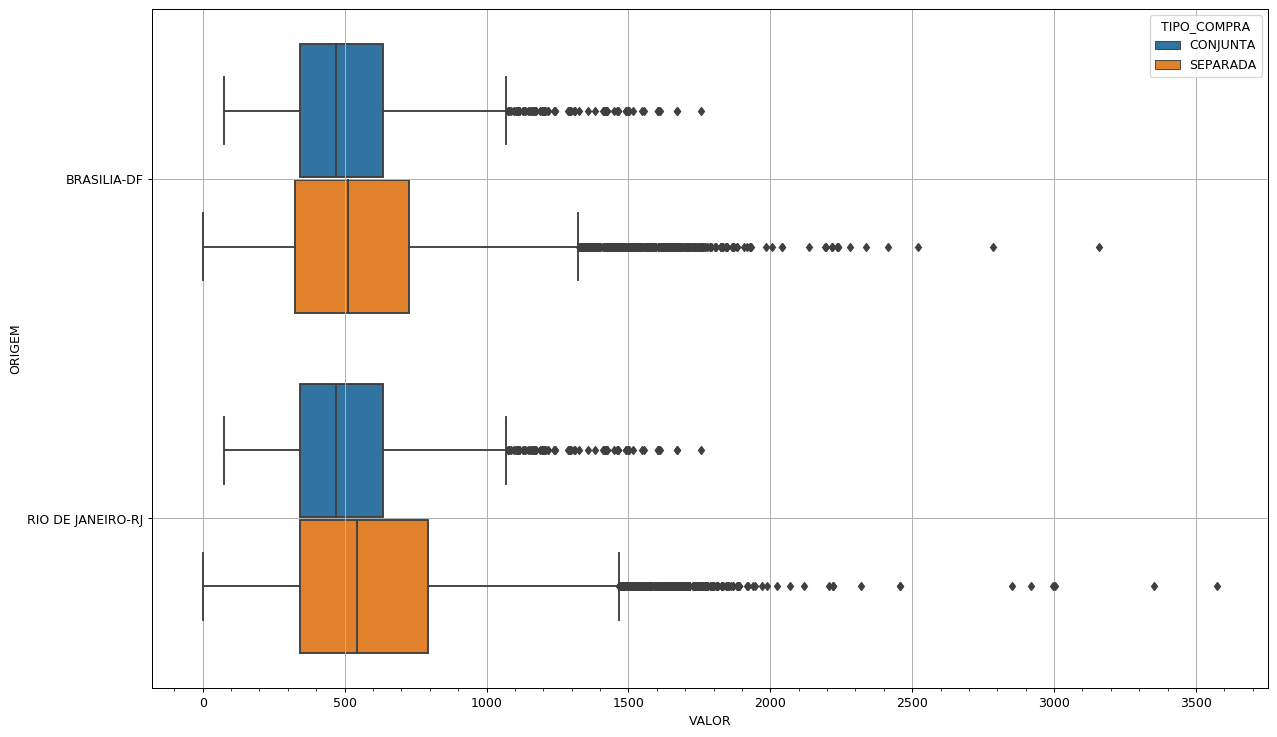

In [187]:
filtro_a = (df_passagens_8['ORIGEM'] == 'RIO DE JANEIRO-RJ') & (df_passagens_8['DESTINO'] == 'BRASILIA-DF')
filtro_b = (df_passagens_8['ORIGEM'] == 'BRASILIA-DF') & (df_passagens_8['DESTINO'] == 'RIO DE JANEIRO-RJ')

df_passagens_g = df_passagens_8[ (filtro_a | filtro_b) ].copy()

df_passagens_g['ORIGEM'] = df_passagens_g['ORIGEM'].astype(str)

ax = sns.boxplot(x='VALOR', y='ORIGEM', data=df_passagens_g, hue='TIPO_COMPRA')
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(100))
plt.grid(True)
plt.show()

In [188]:
df_passagens_g.describe()

,VALOR,TAXA,TRECHO_INT,VIAGEM_INT
count,29812.00,29812.00,29812.00,29812.00
mean,602.35,2.04,0.00,0.00
std,364.95,38.61,0.00,0.00
min,0.00,0.00,0.00,0.00
25%,333.94,0.00,0.00,0.00
50%,517.88,0.00,0.00,0.00
75%,740.40,0.00,0.00,0.00
max,3575.03,1760.90,0.00,0.00


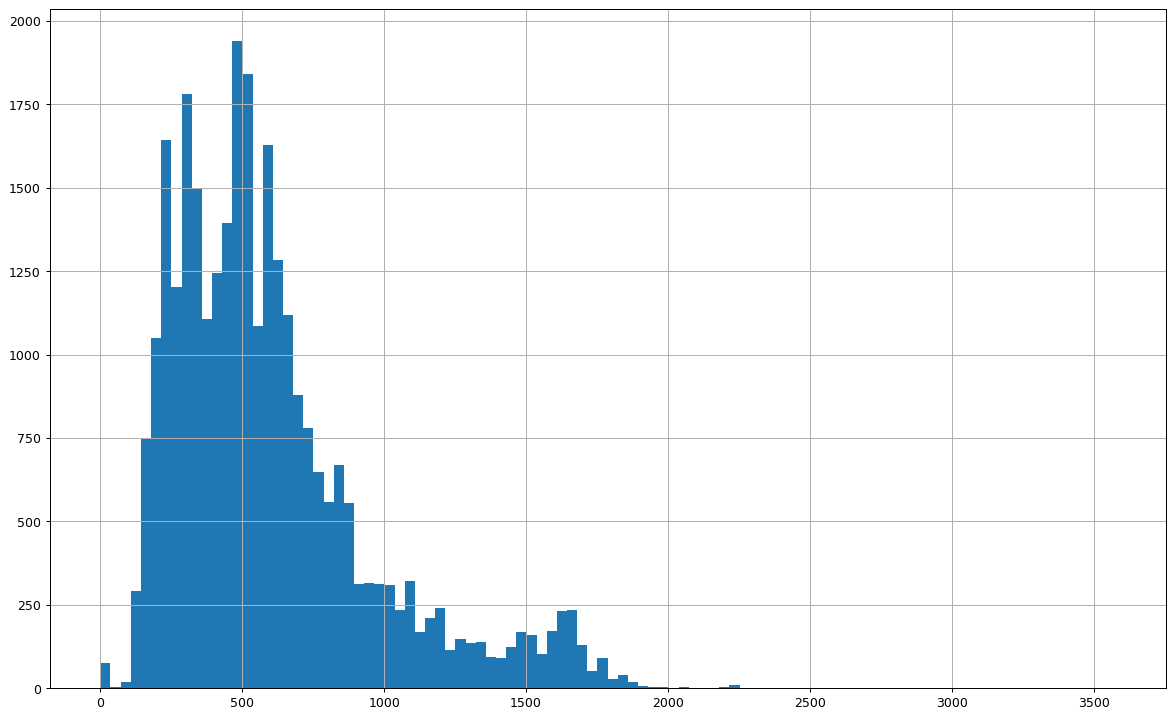

In [192]:
"""
Desenhe um histograma com os valores encontrados para o trecho mais frequente. (Considere ida ou volta)
"""
df_passagens_g['VALOR'].hist(bins=100)
plt.show()

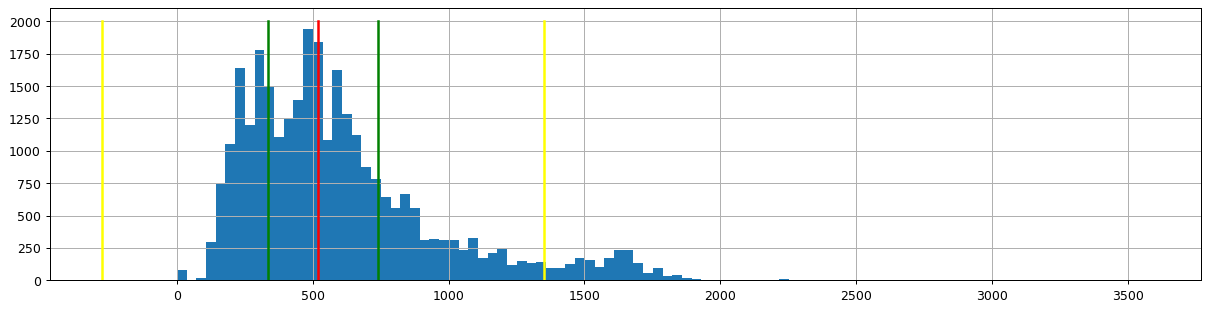

In [199]:
"""
Identifique os outliers utilizando as marcações do boxplot.

IQR = q3 - q1
limite inferior = q1 - 1.5*IQR
limite superior = q3 + 1.5*IQR
"""
plt.rcParams['figure.figsize'] = (16.5, 4)
df_passagens_g['VALOR'].hist(bins=100)

mediana = df_passagens_g['VALOR'].median()
plt.plot([mediana, mediana], [0, 2000], color='red', linewidth=2)

q1, q3 = df_passagens_g['VALOR'].quantile([.25, .75])
iqr = q3 - q1
li = q1 - 1.5*iqr
ls = q3 + 1.5*iqr

plt.plot([li, li], [0, 2000], color='yellow', linewidth=2)
plt.plot([ls, ls], [0, 2000], color='yellow', linewidth=2)

plt.plot([q1, q1], [0, 2000], color='green', linewidth=2)
plt.plot([q3, q3], [0, 2000], color='green', linewidth=2)

plt.show()

In [ ]:
"""
Utilize o dataframe df_viagem para incluir as informações de Órgão Solicitante e Motivo da Viagem
"""
df_viagem = pd.read_csv('dados/c04_passagens/2018_Viagem.csv.zip', sep=';', encoding='iso-8859-1', error_bad_lines=False, quotechar="\"")

In [202]:
df_viagem.head(1)

,Identificador do processo de viagem,Situação,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos
0,13501576,Realizada,36000,MINISTERIO DA SAUDE,36201,FUNDACAO OSWALDO CRUZ,***.637.54*-**,ELIANE CALDAS DO NASCIMENTO OLIVEIRA,PESQUISADOR EM SAUDE PUBLICA,20180210,20180302,Coimbra/Portugal,"PARTICIPAÇÃO EM PROJETOS DE PESQUISA DESENVOLVIDOS PELO BLH/IFF, EM CURSOS DE PÓS-GRADUAÇÃO STRITO CENSO, APERFEIÇOAMENTO, ATUALIZAÇÃO E SENSIBILIZAÇÃO NA CAPACITAÇÃO DE SERVIDORES PROFISSIONAIS DA ÁREA DE SAÚDE, DENTRE OUTROS CURSOS TREINAMENTOS RELACIONADOS À PROMOÇÃO DO ALEITAMENTO MATERNO; PRODUÇÃO ACADÊMICA COM ARTIGOS PARA SEREM PUBLICADOS E ORIENTAÇÃO DE ALUNOS; ASSISTÊNCIA AMBULATORIAL E HOSPITALAR E REUNIÕES E PLANEJAMENTOS.",",00",",00",",00"


In [204]:
"""
Identifique os órgãos com mais ocorrências entre os outliers.
"""
df_completo = pd.merge(df_passagens_g, df_viagem[['Identificador do processo de viagem', 'Nome órgão solicitante', 'Motivo']], how='left', left_on='ID_VIAGEM', right_on='Identificador do processo de viagem')
df_completo.head()

,ID_VIAGEM,ORIGEM,DESTINO,VALOR,TAXA,TRECHO_INT,VIAGEM_INT,TIPO_TRECHO,TIPO_COMPRA,MEIO_TRANSPORTE,Identificador do processo de viagem,Nome órgão solicitante,Motivo
0,14271222,BRASILIA-DF,RIO DE JANEIRO-RJ,143.12,0.00,0,0,IDA,CONJUNTA,AEREO,14271222.00,COMANDO DA AERONAUTICA,Passagem de Chefia do SERIPA 3.
1,14271222,RIO DE JANEIRO-RJ,BRASILIA-DF,143.12,0.00,0,0,VOLTA,CONJUNTA,AEREO,14271222.00,COMANDO DA AERONAUTICA,Passagem de Chefia do SERIPA 3.
2,14349301,RIO DE JANEIRO-RJ,BRASILIA-DF,1469.80,0.00,0,0,IDA,SEPARADA,AEREO,14349301.00,MINISTERIO DAS RELACOES EXTERIORES - UNIDADES COM VÍNCULO DIRETO,"Remoção para SERE, conforme BS nº 195, de 11/10/2017"
3,14391133,RIO DE JANEIRO-RJ,BRASILIA-DF,102.47,0.00,0,0,IDA,CONJUNTA,AEREO,14391133.00,FUNDACAO UNIVERSIDADE DE BRASILIA,"Participação em Banca de defesa de Dissertação do aluno Hécio Wanderley de Souza Almeida, dia 27/02/18."
4,14391133,BRASILIA-DF,RIO DE JANEIRO-RJ,102.47,0.00,0,0,VOLTA,CONJUNTA,AEREO,14391133.00,FUNDACAO UNIVERSIDADE DE BRASILIA,"Participação em Banca de defesa de Dissertação do aluno Hécio Wanderley de Souza Almeida, dia 27/02/18."


In [208]:
df_completo[df_completo['VALOR'] > ls]['Nome órgão solicitante'].value_counts().to_frame().reset_index().rename('').head(10)

,index,Nome órgão solicitante
0,COMANDO DA AERONAUTICA,114
1,MINISTERIO DA EDUCACAO - UNIDADES COM VÍNCULO DIRETO,95
2,PRESIDENCIA DA REPUBLICA - UNIDADES COM VÍNCULO DIRETO,87
3,COMANDO DO EXERCITO,84
4,INST.NACIONAL DE EST.E PESQUISAS EDUCACIONAIS,67
5,COMISSAO NACIONAL DE ENERGIA NUCLEAR,57
6,AGENCIA NACIONAL DO PETROLEO,51
7,MINISTERIO DA FAZENDA - UNIDADES COM VÍNCULO DIRETO,51
8,MINISTERIO DA SAUDE - UNIDADES COM VÍNCULO DIRETO,50
9,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES - UNIDADES COM VÍNCULO DIRETO",49


___
__Material produzido para o curso__:
* Introdução à Análise de Dados com Python

__Autor__:
* Fernando Sola Pereira

__Revisão__:
* 1.1